# opensea

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

No handles with labels found to put in legend.


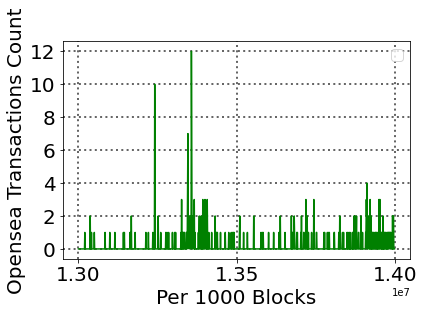

In [72]:
per1wToTxcnts = {}
lines = open("../data/csv/erc20/opensea/blockData_onlyFlashbots.csv").read().split("\n")
for line in lines:
    if line == "":
        break
    tempArr = line.split(",")
    if tempArr[0]=="blockNum":
        continue
    blockNumber = int(tempArr[0])
    tx_count = int(tempArr[1])

    blockNumber1w = int(blockNumber/1000+1)*1000
    if blockNumber1w not in per1wToTxcnts:
        per1wToTxcnts[blockNumber1w] = 0
    per1wToTxcnts[blockNumber1w] += tx_count
    
    # if blockNumber%10000 ==0:
    #     print(blockNumber)
blocks = []
txCnts = []
for blockNumber1w in range(13000000, 14000000, 1000):
    blocks.append(blockNumber1w)
    if blockNumber1w not in per1wToTxcnts:
        per1wToTxcnts[blockNumber1w] = 0
    txCnts.append(per1wToTxcnts[blockNumber1w])


plt.grid(True, color='#666666', linestyle = ":", linewidth = "2")
lines = ["r-","g--","b-","c-","m--"]

plt.plot(blocks, txCnts, "g-",  markersize=20)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Opensea Transactions Count', fontsize=20)
plt.xlabel('Per 1000 Blocks', fontsize=20)
plt.xticks([13000000, 13500000, 14000000],fontsize=20)
plt.yticks(fontsize=20)
# plt.axis().get_major_formatter().set_scientific(False)
#plt.xlim(120,)
#plt.ylim(100000,200000)
plt.legend(fontsize=15)

plt.tight_layout()

# plt.show()
plt.savefig("../data/photo/opensea/txsCount_opensea.pdf")

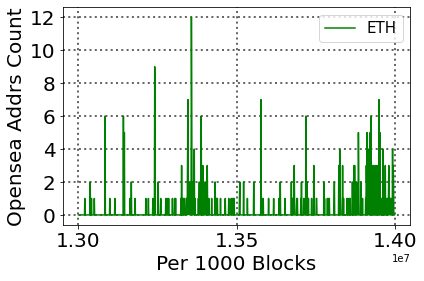

In [73]:
per1wToAddrcnts = {}
lines = open("../data/csv/erc20/opensea/blockData_fromAddrsTable_onlyFlashbots.csv").read().split("\n")
for line in lines:
    if line == "":
        break
    tempArr = line.split(",")
    if tempArr[0]=="blockNum":
        continue
    blockNumber = int(tempArr[0])
    addr_count = int(tempArr[1])

    blockNumber1w = int(blockNumber/1000+1)*1000
    if blockNumber1w not in per1wToAddrcnts:
        per1wToAddrcnts[blockNumber1w] = 0
    per1wToAddrcnts[blockNumber1w] += addr_count
    
    # if blockNumber%10000 ==0:
    #     print(blockNumber)
blocks = []
txCnts = []
for blockNumber1w in range(13000000, 14000000, 1000):
    blocks.append(blockNumber1w)
    if blockNumber1w not in per1wToAddrcnts:
        per1wToAddrcnts[blockNumber1w] = 0
    txCnts.append(per1wToAddrcnts[blockNumber1w])
    
plt.grid(True, color='#666666', linestyle = ":", linewidth = "2")
lines = ["r-","g--","b-","c-","m--"]

plt.plot(blocks, txCnts, "g-", label='ETH',  markersize=20)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Opensea Addrs Count', fontsize=20)
plt.xlabel('Per 1000 Blocks', fontsize=20)
plt.xticks([13000000, 13500000, 14000000],fontsize=20)
plt.yticks(fontsize=20)
# plt.axis().get_major_formatter().set_scientific(False)
#plt.xlim(120,)
#plt.ylim(100000,200000)
plt.legend(fontsize=15)

plt.tight_layout()

# plt.show()
plt.savefig("../data/photo/opensea/addrCount_opensea.pdf")

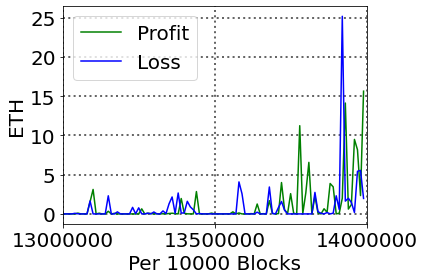

In [74]:
per1wToTokenPos = {}
lines = open("../data/csv/erc20/opensea/blockData_fromAddrsTable_onlyFlashbots.csv").read().split("\n")
for line in lines:
    if line == "":
        break
    tempArr = line.split(",")
    if tempArr[0]=="blockNum":
        continue
    blockNumber = int(tempArr[0])
    tokenPos = float(tempArr[2])/pow(10,18)

    blockNumber1w = int(blockNumber/10000+1)*10000
    if blockNumber1w not in per1wToTokenPos:
        per1wToTokenPos[blockNumber1w] = 0
    per1wToTokenPos[blockNumber1w] += tokenPos


per1wToTokenNeg = {}
lines = open("../data/csv/erc20/opensea/blockData_fromAddrsTable_onlyFlashbots.csv").read().split("\n")
for line in lines:
    if line == "":
        break
    tempArr = line.split(",")
    if tempArr[0]=="blockNum":
        continue
    blockNumber = int(tempArr[0])
    tokenNeg = float(tempArr[3])/pow(10,18)

    blockNumber1w = int(blockNumber/10000+1)*10000
    if blockNumber1w not in per1wToTokenNeg:
        per1wToTokenNeg[blockNumber1w] = 0
    per1wToTokenNeg[blockNumber1w] += abs(tokenNeg)
    
    
blocks = []
pos = []
neg = []
for blockNumber1w in range(13000000, 14000000, 10000):
    blocks.append(blockNumber1w)
    if blockNumber1w not in per1wToTokenPos:
        per1wToTokenPos[blockNumber1w] = 0.0
    if blockNumber1w not in per1wToTokenNeg:
        per1wToTokenNeg[blockNumber1w] = 0.0
        
    pos.append(per1wToTokenPos[blockNumber1w])
    neg.append(per1wToTokenNeg[blockNumber1w])
    
    
msize = 15


fig,ax1 = plt.subplots()
# ax2 = ax1.twinx()           # 做镜像处理
# ax2=ax1


ax1.plot(blocks,pos, "g-", label='Profit', markersize=msize)#label为标签
ax1.get_xaxis().get_major_formatter().set_scientific(False)
ax1.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
# ax1.get_yaxis().get_major_formatter().set_scientific(True)

# plt.plot(blocks,maxGasPrice, label='MAX',markersize=msize)#label为标签
ax1.plot(blocks,neg, "b-", label='Loss', markersize=msize)#label为标签
ax1.get_xaxis().get_major_formatter().set_scientific(False)
ax1.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
# ax2.get_yaxis().get_major_formatter().set_scientific(True)



ax1.set_xlabel('Per 10000 Blocks', fontsize=20)    #设置x轴标题
ax1.set_ylabel('ETH', fontsize=20)   #设置Y1轴标题
# ax1.set_ylabel('Loss', color='b', fontsize=20)  #设置Y2轴标题

location = 2
ax1.legend(loc=location, ncol=1, fontsize=20)#图例及位置： 1右上角，2 左上角 loc函数可不写 0为最优 ncol为标签有几列

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
plt.yticks(fontsize=20)
plt.xticks([13000000, 13500000, 14000000])
plt.xlim([13000000,14000000])

plt.grid(True, color='#666666', linestyle = ":", linewidth = "2")

plt.tight_layout()
# plt.show()

plt.savefig("../data/photo/opensea/ether_opensea.pdf")
    

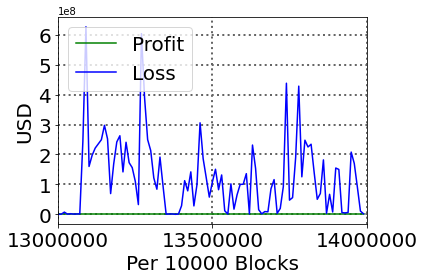

In [75]:
per1wToTokenPos = {}
lines = open("../data/csv/erc20/opensea/blockData_fromAddrsTable_onlyFlashbots.csv").read().split("\n")
for line in lines:
    if line == "":
        break
    tempArr = line.split(",")
    if tempArr[0]=="blockNum":
        continue
    blockNumber = int(tempArr[0])
    tokenPos = float(tempArr[6])

    blockNumber1w = int(blockNumber/10000+1)*10000
    if blockNumber1w not in per1wToTokenPos:
        per1wToTokenPos[blockNumber1w] = 0
    per1wToTokenPos[blockNumber1w] += tokenPos


per1wToTokenNeg = {}
lines = open("../data/csv/erc20/blockData_fromAddrsTable_onlyFlashbots.csv").read().split("\n")
for line in lines:
    if line == "":
        break
    tempArr = line.split(",")
    if tempArr[0]=="blockNum":
        continue
    blockNumber = int(tempArr[0])
    tokenNeg = float(tempArr[7])

    blockNumber1w = int(blockNumber/10000+1)*10000
    if blockNumber1w not in per1wToTokenNeg:
        per1wToTokenNeg[blockNumber1w] = 0
    per1wToTokenNeg[blockNumber1w] += abs(tokenNeg)
    
    
blocks = []
pos = []
neg = []
for blockNumber1w in range(13000000, 14000000, 10000):
    blocks.append(blockNumber1w)
    if blockNumber1w not in per1wToTokenPos:
        per1wToTokenPos[blockNumber1w] = 0.0
    if blockNumber1w not in per1wToTokenNeg:
        per1wToTokenNeg[blockNumber1w] = 0.0
        
    pos.append(per1wToTokenPos[blockNumber1w])
    neg.append(per1wToTokenNeg[blockNumber1w])
    
msize = 15


fig,ax1 = plt.subplots()
# ax2 = ax1.twinx()           # 做镜像处理
ax2=ax1


ax1.plot(blocks,pos, "g-", label='Profit', markersize=msize)#label为标签
ax1.get_xaxis().get_major_formatter().set_scientific(False)
ax1.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
# ax1.get_yaxis().get_major_formatter().set_scientific(True)


# plt.plot(blocks,maxGasPrice, label='MAX',markersize=msize)#label为标签
ax2.plot(blocks,neg, "b-", label='Loss', markersize=msize)#label为标签
ax2.get_xaxis().get_major_formatter().set_scientific(False)
ax2.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
# ax2.get_yaxis().get_major_formatter().set_scientific(True)



ax1.set_xlabel('Per 10000 Blocks', fontsize=20)    #设置x轴标题
ax1.set_ylabel('USD', fontsize=20)   #设置Y1轴标题
# ax2.set_ylabel('Loss', color='b', fontsize=20)  #设置Y2轴标题

location = 2
ax1.legend(loc=location, ncol=1, fontsize=20)#图例及位置： 1右上角，2 左上角 loc函数可不写 0为最优 ncol为标签有几列

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
plt.yticks(fontsize=20)
plt.xticks([13000000, 13500000, 14000000])
plt.xlim([13000000,14000000])

plt.grid(True, color='#666666', linestyle = ":", linewidth = "2")

plt.tight_layout()
# plt.show()

plt.savefig("../data/photo/opensea/dollar_opensea.pdf")
    

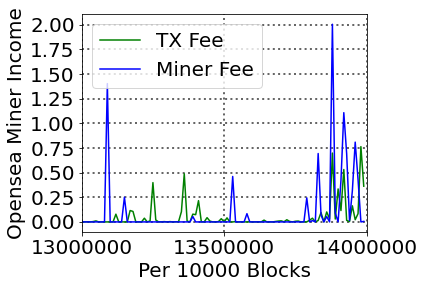

In [76]:
per1wToTokenPos = {}
lines = open("../data/csv/erc20/opensea/blockData_onlyFlashbots.csv").read().split("\n")
for line in lines:
    if line == "":
        break
    tempArr = line.split(",")
    if tempArr[0]=="blockNum":
        continue
    blockNumber = int(tempArr[0])
    tokenPos = float(tempArr[2])/pow(10,18)

    blockNumber1w = int(blockNumber/10000+1)*10000
    if blockNumber1w not in per1wToTokenPos:
        per1wToTokenPos[blockNumber1w] = 0
    per1wToTokenPos[blockNumber1w] += tokenPos


per1wToTokenNeg = {}
lines = open("../data/csv/erc20/opensea/blockData_onlyFlashbots.csv").read().split("\n")
for line in lines:
    if line == "":
        break
    tempArr = line.split(",")
    if tempArr[0]=="blockNum":
        continue
    blockNumber = int(tempArr[0])
    tokenNeg = float(tempArr[3])/pow(10,18)

    blockNumber1w = int(blockNumber/10000+1)*10000
    if blockNumber1w not in per1wToTokenNeg:
        per1wToTokenNeg[blockNumber1w] = 0
    per1wToTokenNeg[blockNumber1w] += tokenNeg
    
    
    
#·········································
blocks = []
pos = []
neg = []
for blockNumber1w in range(13000000, 14000000, 10000):
    blocks.append(blockNumber1w)
    if blockNumber1w not in per1wToTokenPos:
        per1wToTokenPos[blockNumber1w] = 0.0
    if blockNumber1w not in per1wToTokenNeg:
        per1wToTokenNeg[blockNumber1w] = 0.0
        
    pos.append(per1wToTokenPos[blockNumber1w])
    neg.append(per1wToTokenNeg[blockNumber1w])
    
msize = 15


fig,ax1 = plt.subplots()
# ax2 = ax1.twinx()           # 做镜像处理
ax2=ax1


ax1.plot(blocks,pos, "g-", label='TX Fee', markersize=msize)#label为标签
ax1.get_xaxis().get_major_formatter().set_scientific(False)
ax1.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
# ax1.get_yaxis().get_major_formatter().set_scientific(True)


# plt.plot(blocks,maxGasPrice, label='MAX',markersize=msize)#label为标签
ax2.plot(blocks,neg, "b-", label='Miner Fee', markersize=msize)#label为标签
ax2.get_xaxis().get_major_formatter().set_scientific(False)
ax2.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
# ax2.get_yaxis().get_major_formatter().set_scientific(True)



ax1.set_xlabel('Per 10000 Blocks', fontsize=20)    #设置x轴标题
ax1.set_ylabel('Opensea Miner Income', fontsize=20)   #设置Y1轴标题
# ax2.set_ylabel('Loss', color='b', fontsize=20)  #设置Y2轴标题

location = 2
ax1.legend(loc=location, ncol=1, fontsize=20)#图例及位置： 1右上角，2 左上角 loc函数可不写 0为最优 ncol为标签有几列

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
plt.yticks(fontsize=20)
plt.xticks([13000000, 13500000, 14000000])
plt.xlim([13000000,14000000])

plt.grid(True, color='#666666', linestyle = ":", linewidth = "2")

plt.tight_layout()
# plt.show()

plt.savefig("../data/photo/opensea/minerIncome_opensea.pdf")
    
    

# swap